In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [77]:
attractors = [(np.array([0,0]),1.1),(np.array([0,1]),1.15),(np.array([4,1]),3),
        (np.array([4,4]),8)]
def ode(t,x):
    # Define parameters
    max_speed = .1
    bee_pref = 1.2
    velocity = 0
    max_attractors = [np.argmin(np.abs(np.array([bee_pref-attractors[i][1] for i in range(len(attractors))])))]
    # Iterate over each flower of influene
    for i in max_attractors:
        # Calculate vector between bee and flower
        d =  attractors[i][0] - x
        # Add the influence of the attractor in the direction of the flower
        G = lambda x: .1/((bee_pref-attractors[i][1])+.1)/(np.linalg.norm(d)**2 + 1)
        velocity += max_speed/(1+np.exp(-G(x)))*d/(np.linalg.norm(d) + 1)
    # Add random perturbation, and return the total velocity
    buzz_factor = np.array([velocity[1],-velocity[0]])
    return velocity + 1*np.sin(t/0.5)*(buzz_factor/(np.linalg.norm(buzz_factor)+1))

sol = solve_ivp(ode,(0,300),np.array([5,2]),max_step=.1)

0.024691358024691357
0.025303837728597987
0.02469925309308827
0.024703201821922677
0.02472295926414057
0.02472647402713423
0.02473086847003764
0.024730868469923277
0.02473878133058822
0.02474273895887252
0.024762540938015443
0.024766063625337335
0.024770467976462027
0.024770467976335538
0.024778398680031483
0.02478236523316135
0.024802211876332896
0.024805742510601834
0.02481015679823091
0.024810156798092217
0.024818105395754787
0.024822080899212253
0.02484197233394836
0.024845510937860124
0.02484993519037288
0.024849935190221956
0.024857901732960038
0.024861886212313895
0.02488182256658453
0.024885369162912126
0.024889803408784474
0.02488980340862126
0.02489778794771775
0.024901781428623808
0.024921762830834655
0.02492531744242868
0.02492976171023351
0.024929761710057962
0.024937764296970363
0.024941766805171864
0.024961793384166046
0.024965356033954895
0.024969810352362443
0.02496981035217452
0.024977831038535687
0.02498184259986358
0.025001914484923327
0.025005485195913602
0.0250099

3002


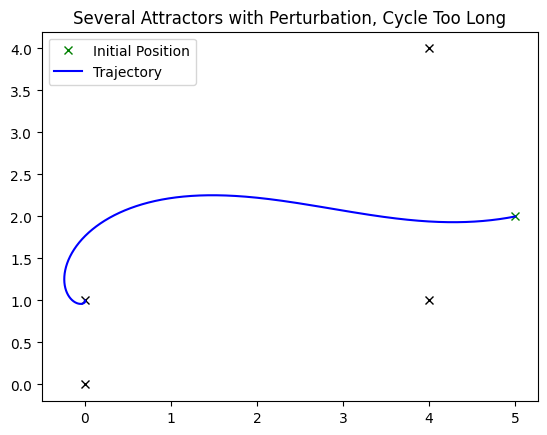

In [79]:
for attractor in attractors:
    plt.plot(attractor[0][0],attractor[0][1],'kx')
plt.plot(5,2,"gx",label="Initial Position")
print(len(sol.y[0]))
plt.plot(sol.y[0],sol.y[1],'b-',label="Trajectory")
plt.title("Several Attractors with Perturbation, Cycle Too Long")
plt.legend(loc="best")
plt.savefig("several_attractors5.png",dpi=100)
